<a href="https://colab.research.google.com/github/schneesternsilvpascal7/schneesternsilvpascal7/blob/main/Copy_of_Nutrition_Exercise_GL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Understand how to program a simple linear programming case study in Python using PuLP

Case study:

Suppose that you are a nutritionist that work for a hospital. You have to make a diet plan for a patient using three kinds of food: Chicken, potatoes, and fruit salad. You have to determine the right quantity of each of these foods (in fractional) so that he fulfill his daily nutritional requirements. Besides, you also have to make sure that you use the lowest cost possible. The nutritional and cost information of the three foods are as follows:

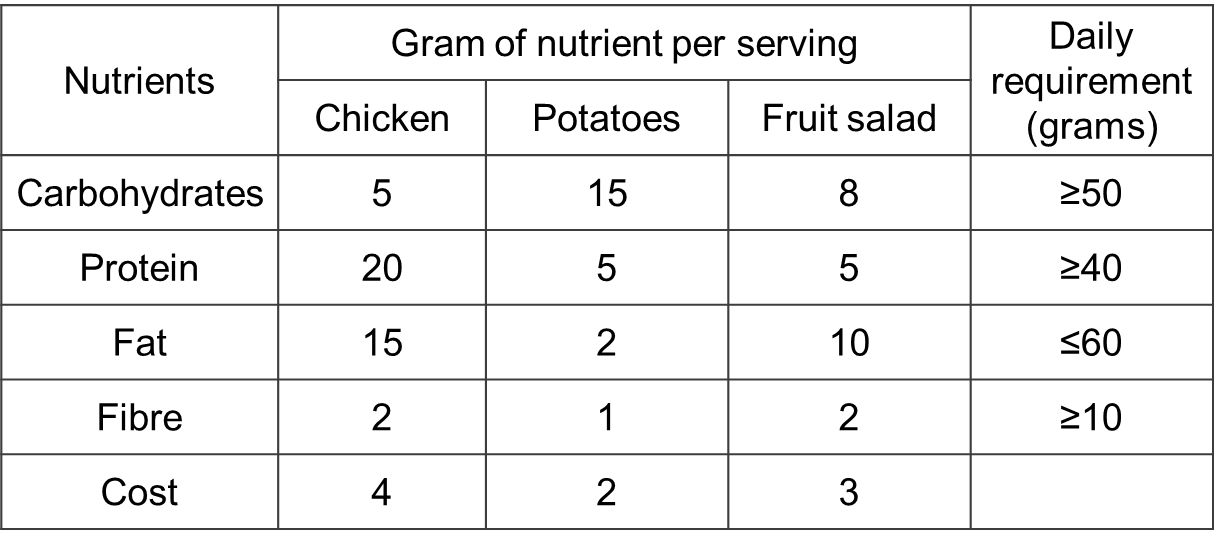

Solve this problem!



##### Example: only chicken and potato are considered, and we consider only carbo, protein, and fat constraints

In [ ]:
#install pulp library
%pip install pulp

#import PuLP modeler function
from pulp import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 56.2 MB/s eta 0:00:00


In [ ]:
#create 'prob' variable and assign problem data to it (the variable name can be anything)
#LpProblem function is used to create problem data. It has 2 parameters: name of the problem (String, no space) and type of linear programming (either LpMinimize or LpMaximize)
prob = LpProblem("TheNutritionProblem", LpMinimize)

In [ ]:
#create decision variable
#LpVariable function is used to create decision variable. It has 4 parameters: arbitrary name of variable, lower bond of variable, upper bound of variable, and type of data
#possible type of data: LpContinuous, LpInteger, LpBinary

x = LpVariable("Qty_chicken", 0, None, LpContinuous)
y = LpVariable("Qty_potato", 0)

In [ ]:
#create objective function and insert it to prob variable
prob += 4 * x + 2 * y, "TotalCost"

In [ ]:
#create constraints and insert them to prob variable (problem data)
prob += 5 * x + 15 * y >= 50, "CarboRequirement"
prob += 20 * x + 5 * y >= 40, "ProteinRequirement"
prob += 15 * x + 2 * y <= 60, "FatRequirement"

In [ ]:
#call writeLP function to copy problem data into a .lp file
prob.writeLP("Nutrition.lp")

#call solve function to solve the problem using solver
prob.solve()

#display the results of the solver by calling LpStatus function (Possible output: Optimal/not solved/infeasible/unbounded/undefined)
print("Status:", LpStatus[prob.status])

In [ ]:
#display resolved optimum value using value function
print("Total cost = ", value(prob.objective))

#display optimum value of each of decision variable
for v in prob.variables():
    print(v.name, "=", v.varValue)

Q1: Add the fruit salad product into the problem and solve the problem

In [ ]:
prob = LpProblem("TheNutritionProblem", LpMinimize)

x = LpVariable("Qty_chicken", 0, None, LpContinuous)
y = LpVariable("Qty_potato", 0)

prob += 4 * x + 2 * y, "TotalCost"

prob += 5 * x + 15 * y >= 50, "CarboRequirement"
prob += 20 * x + 5 * y >= 40, "ProteinRequirement"
prob += 15 * x + 2 * y <= 60, "FatRequirement"

prob.writeLP("Nutrition.lp")
prob.solve()
print("Status:", LpStatus[prob.status])

print("Total cost = ", value(prob.objective))
for v in prob.variables():
    print(v.name, "=", v.varValue)

Q2: Add the constraint of fibre requirement and solve the problem

In [ ]:
prob = LpProblem("TheNutritionProblem", LpMinimize)

x = LpVariable("Qty_chicken", 0, None, LpContinuous)
y = LpVariable("Qty_potato", 0)

prob += 4 * x + 2 * y, "TotalCost"

prob += 5 * x + 15 * y >= 50, "CarboRequirement"
prob += 20 * x + 5 * y >= 40, "ProteinRequirement"
prob += 15 * x + 2 * y <= 60, "FatRequirement"

prob.writeLP("Nutrition.lp")
prob.solve()
print("Status:", LpStatus[prob.status])

print("Total cost = ", value(prob.objective))
for v in prob.variables():
    print(v.name, "=", v.varValue)

Q3: Other way to write the LP problem is by using dictionary and list. It is an easier way especially when we are going to test different variables. Modify the problem data in Q2 using list/dictionary

In [ ]:
prob = LpProblem("TheNutritionProblem", LpMinimize)

#example of parameters: put the values in the list
food_list = ['Steak', 'Potato']
costs = [4, 2]
carbo = [5, 15]
...

#create dictionary(combining 2 lists, with one of them become the key)
food_cost = dict(zip(food_list, costs))
food_carbo = dict(zip(food_list, carbo))
...

#decision variable
food_quantity = LpVariable.dicts("Qty", food_list, 0)

#objective function
prob += lpSum(food_cost[i]*food_quantity[i] for i in food_list)

#constraints
prob += lpSum(food_carbo[i]*food_quantity[i] for i in food_list) >= 50
...

#solve the probklem (don't modify anything here)
prob.writeLP("NutritionList.lp")
prob.solve()
print("Status:", LpStatus[prob.status])

print("Total cost = ", value(prob.objective))
for v in prob.variables():
    print(v.name, "=", v.varValue)